# 1.1 Import Libraries and Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display options
pd.set_option('display.max_columns', None)

# Load dataset
df = pd.read_csv("pp_recipes.csv") 

# Preview
print(df.shape)
df.head()


C:\Users\Asus\AppData\Local\Temp\ipykernel_23944\2508681952.py:10: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("pp_recipes.csv")


(507335, 37)


,Unnamed: 0,recipe_id,title,description,author_id,duration,directions,ingredients,serves,last_changed_date,food_kg_locator,recipe_url,tags,new_recipe_id,new_author_id,average_rating,number_of_ratings,servingsPerRecipe,servingSize [g],calories [cal],caloriesFromFat [cal],totalFat [g],saturatedFat [g],cholesterol [mg],sodium [mg],totalCarbohydrate [g],dietaryFiber [g],sugars [g],protein [g],direction_size,ingredients_sizes,who_score,fsa_score,nutri_score,normalization_comment,ingredient_food_kg_urls,ingredient_food_kg_names
0,0,447642,Cranberry-Orange Caramel Corn,"Taken from Beter Homes and Gardens, November 2...",409184,40.0,['Preheat oven to 275 degrees. In a very large...,"{'': [('popcorn, popped', '12 time(s) cups ')...",20,2011-01-29,http://idea.rpi.edu/heals/kb/recipe/5e6ae80d-C...,https://www.food.com/recipe/cranberry-orange-c...,NaN,0,4589,0.0,0,20,30.0,97.2,57.0,6.4,3.0,12.2,73.8,9.9,0.7,6.9,0.8,9,9,0.168254,0.000,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['baking soda', 'brown sugar', 'butter', 'corn..."
1,1,53662,Cocktail De Camarones,I ordered shrimp cocktail at a Mexican restaur...,64251,20.0,"['After you chop the tomatoes, onions and cila...",{'': [('shelled and cooked shrimp (50-60 count...,2-4,2009-06-03,http://idea.rpi.edu/heals/kb/recipe/d6b47db2-C...,https://www.food.com/recipe/cocktail-de-camaro...,"['30-minutes-or-less', 'time-to-make', 'course...",1,142553,5.0,5,2,303.0,427.3,158.0,17.6,2.9,442.0,526.3,17.8,9.4,6.3,51.3,7,10,0.335455,0.625,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['avocado', 'cilantro', 'cooked shrimp', 'garl..."
2,2,520465,Inbal Jerusalem Hotel Snowball,This recipe was created in response to a Janua...,1803632771,210.0,"['Combine gelatin with cold water', 'Combine c...","{'': [('cream', '200 time(s) g '), ('vanilla ...",5,2015-01-08,http://idea.rpi.edu/heals/kb/recipe/29080638-I...,https://www.food.com/recipe/inbal-jerusalem-ho...,NaN,2,276377,0.0,0,5,759.0,1273.2,610.0,67.8,40.3,307.5,475.7,85.3,0.3,78.0,87.7,12,17,0.128082,0.000,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['cold water', 'condensed milk', 'cornflour', ..."
3,3,213601,Santorini Roasted Leg of Lamb,A succulent slow-roasted leg of lamb with herb...,183057,375.0,['Trim excess fat and silver skin from lamb le...,"{'': [('of lamb', '6 time(s) lbs leg '), ('dr...",10-12,2009-05-17,http://idea.rpi.edu/heals/kb/recipe/6af68948-S...,https://www.food.com/recipe/santorini-roasted-...,"['course', 'main-ingredient', 'cuisine', 'occa...",3,5016,4.5,2,10,251.0,581.9,333.0,37.1,15.9,182.3,159.1,7.6,2.0,3.6,51.1,8,8,0.320622,0.375,0.00,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['dried mint flakes', 'dried oregano', 'dried ..."
4,4,67731,Cantonese Chicken Burgers,Adapted from a recipe in BHG's grilling magazine.,37779,38.0,"['In a mixing bowl, add the egg, sesame oil, a...","{'': [('egg, beaten', '1 time(s) '), ('toaste...",4,2007-11-21,http://idea.rpi.edu/heals/kb/recipe/83f130d0-C...,https://www.food.com/recipe/cantonese-chicken-...,NaN,4,105,0.0,0,4,242.0,443.8,167.0,18.6,4.4,144.0,649.2,39.6,3.0,4.2,30.3,6,12,0.254427,0.500,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['carrots', 'egg', 'fine dry breadcrumbs', 'ga..."


# 1.2 Basic Information and Missing Values

In [2]:
# Overview
df.info()

# Missing value summary
missing = df.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507335 entries, 0 to 507334
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                507335 non-null  int64  
 1   recipe_id                 507335 non-null  int64  
 2   title                     507335 non-null  object 
 3   description               497228 non-null  object 
 4   author_id                 507335 non-null  int64  
 5   duration                  499997 non-null  float64
 6   directions                507335 non-null  object 
 7   ingredients               507333 non-null  object 
 8   serves                    435937 non-null  object 
 9   last_changed_date         507335 non-null  object 
 10  food_kg_locator           507335 non-null  object 
 11  recipe_url                507335 non-null  object 
 12  tags                      230649 non-null  object 
 13  new_recipe_id             507335 non-null  i

# 1.3 Summary Statistics

In [3]:
# Focus on key numeric features
numeric_cols = [
    'calories [cal]',
    'protein [g]',
    'sugars [g]',
    'sodium [mg]',
    'duration'
]

# Generate descriptive statistics
summary = df[numeric_cols].describe()

# Display the summary table
print("Summary statistics for key nutritional features:\n")
print(summary)


Summary statistics for key nutritional features:

       calories [cal]    protein [g]     sugars [g]   sodium [mg]  \
count   507335.000000  507335.000000  507335.000000  5.073350e+05   
mean       482.941570      17.417222      21.858976  7.612783e+02   
std       1406.907529      39.809875     144.003945  4.076175e+03   
min          0.000000       0.000000       0.000000  0.000000e+00   
25%        173.900000       3.500000       2.500000  1.230000e+02   
50%        316.500000       9.100000       6.400000  3.522000e+02   
75%        527.600000      25.000000      17.900000  7.892000e+02   
max     612854.600000   18396.200000   90682.300000  1.246921e+06   

            duration  
count  499997.000000  
mean       64.794413  
std        95.036256  
min         1.000000  
25%        20.000000  
50%        40.000000  
75%        65.000000  
max      1425.000000  


# 1.4 Visualize Nutritional Distributions

In [6]:
print(df.columns)


Index(['Unnamed: 0', 'recipe_id', 'title', 'description', 'author_id',
       'duration', 'directions', 'ingredients', 'serves', 'last_changed_date',
       'food_kg_locator', 'recipe_url', 'tags', 'new_recipe_id',
       'new_author_id', 'average_rating', 'number_of_ratings',
       'servingsPerRecipe', 'servingSize [g]', 'calories [cal]',
       'caloriesFromFat [cal]', 'totalFat [g]', 'saturatedFat [g]',
       'cholesterol [mg]', 'sodium [mg]', 'totalCarbohydrate [g]',
       'dietaryFiber [g]', 'sugars [g]', 'protein [g]', 'direction_size',
       'ingredients_sizes', 'who_score', 'fsa_score', 'nutri_score',
       'normalization_comment', 'ingredient_food_kg_urls',
       'ingredient_food_kg_names'],
      dtype='object')


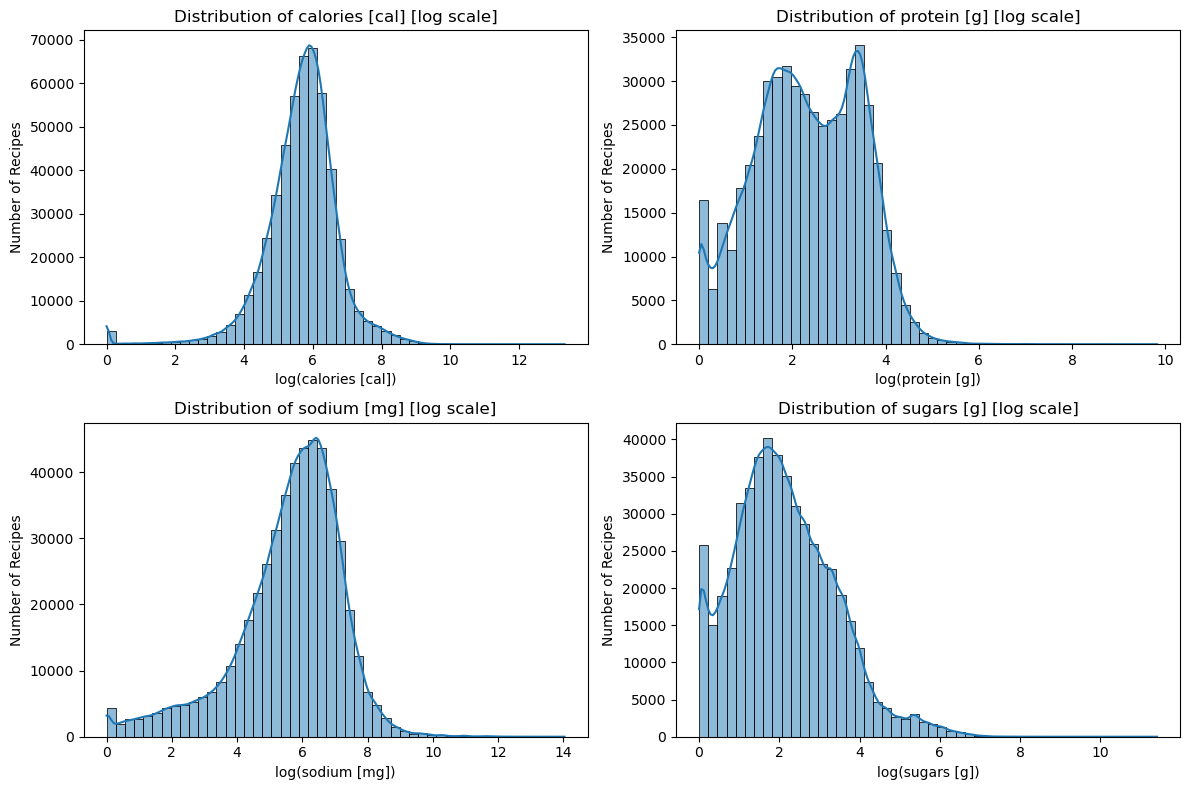

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Correct column names from your DataFrame
nutrients = ['calories [cal]', 'protein [g]', 'sodium [mg]', 'sugars [g]']

plt.figure(figsize=(12,8))

for i, col in enumerate(nutrients, 1):
    plt.subplot(2, 2, i)
    sns.histplot(np.log1p(df[col]), bins=50, kde=True)
    plt.title(f"Distribution of {col} [log scale]")
    plt.xlabel(f"log({col})")
    plt.ylabel("Number of Recipes")

plt.tight_layout()
plt.show()


# 1.5 Quick vs Long Recipes

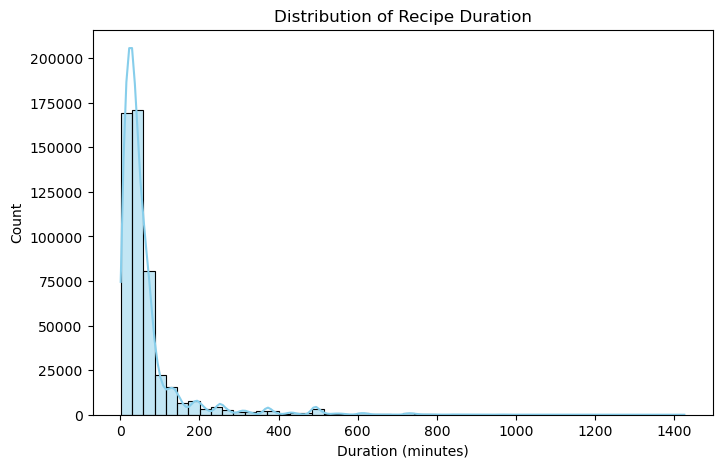

Quick recipes (≤30 min): 209,523
Long recipes (>30 min): 290,474


In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['duration'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Recipe Duration")
plt.xlabel("Duration (minutes)")
plt.ylabel("Count")
plt.show()

quick = (df['duration'] <= 30).sum()
long  = (df['duration'] > 30).sum()
print(f"Quick recipes (≤30 min): {quick:,}")
print(f"Long recipes (>30 min): {long:,}")


# 1.5 Health Categories (derived from nutri_score)

In [11]:
df['nutri_score'].describe()


count    507335.000000
mean          0.239719
std           0.241530
min           0.000000
25%           0.000000
50%           0.250000
75%           0.250000
max           1.000000
Name: nutri_score, dtype: float64

C:\Users\Asus\AppData\Local\Temp\ipykernel_23944\3587320192.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='health_category', data=df,


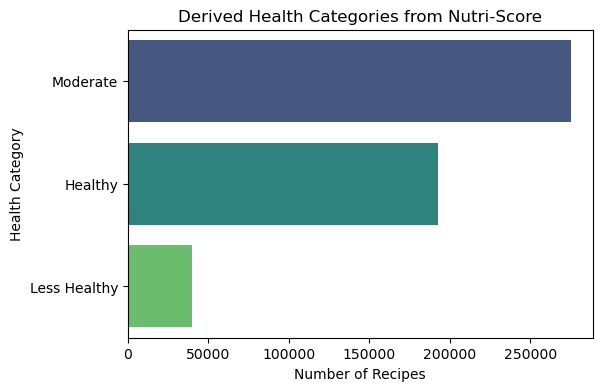

In [12]:
def health_category(score):
    if score <= 0.2:
        return "Healthy"
    elif score <= 0.5:
        return "Moderate"
    else:
        return "Less Healthy"

df['health_category'] = df['nutri_score'].apply(health_category)

plt.figure(figsize=(6,4))
sns.countplot(y='health_category', data=df,
              order=df['health_category'].value_counts().index,
              palette='viridis')
plt.title("Derived Health Categories from Nutri-Score")
plt.xlabel("Number of Recipes")
plt.ylabel("Health Category")
plt.show()


# 1.6 Top Tags

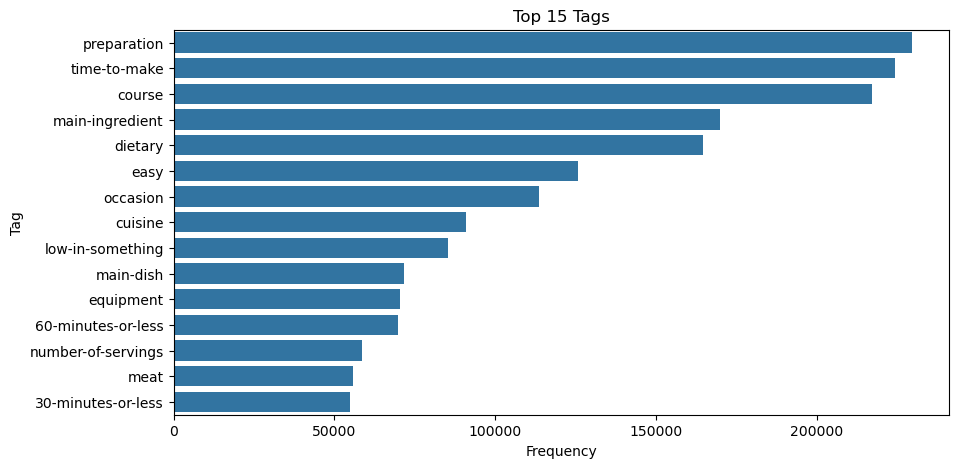

In [13]:
from collections import Counter
import ast

def extract_list_values(series):
    all_items = []
    for val in series.dropna():
        try:
            items = ast.literal_eval(val)
            if isinstance(items, list):
                all_items.extend(items)
        except:
            continue
    return all_items

# Extract top tags
tag_list = extract_list_values(df['tags'])
top_tags = Counter(tag_list).most_common(15)

plt.figure(figsize=(10,5))
sns.barplot(x=[x[1] for x in top_tags], y=[x[0] for x in top_tags])
plt.title("Top 15 Tags")
plt.xlabel("Frequency")
plt.ylabel("Tag")
plt.show()


# 1.7 Top Ingredients

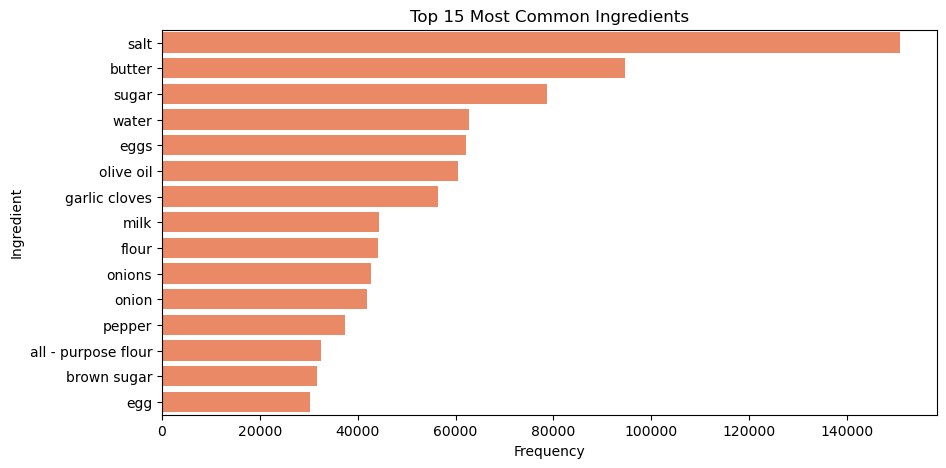

In [14]:
ing_list = extract_list_values(df['ingredient_food_kg_names'])
top_ing = Counter(ing_list).most_common(15)

plt.figure(figsize=(10,5))
sns.barplot(x=[x[1] for x in top_ing], y=[x[0] for x in top_ing], color='coral')
plt.title("Top 15 Most Common Ingredients")
plt.xlabel("Frequency")
plt.ylabel("Ingredient")
plt.show()


# 1.8 Protein vs Calories Correlation

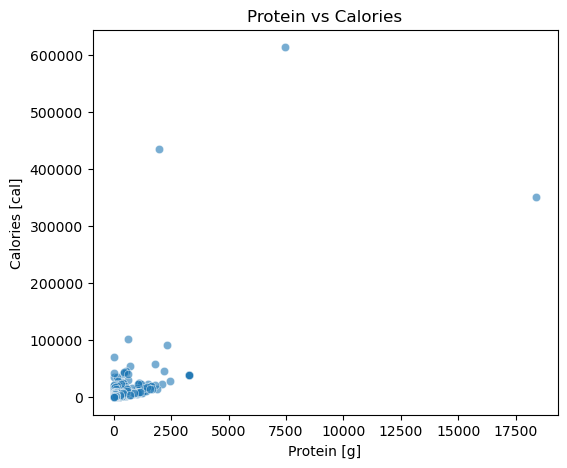

Correlation between Protein and Calories: 0.66


In [15]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='protein [g]', y='calories [cal]', alpha=0.6)
plt.title("Protein vs Calories")
plt.xlabel("Protein [g]")
plt.ylabel("Calories [cal]")
plt.show()

corr = df['protein [g]'].corr(df['calories [cal]'])
print(f"Correlation between Protein and Calories: {corr:.2f}")